In [1]:
import pandas as pd
import numpy as np
import os
import pickle

In [18]:
# importing the streams count

df = pd.read_csv('../02.cleaning/aggregated_country_streams.csv', header=1)
#df2=pd.read_pkl('../02.cleaning/lockdown_clean.pkl')
df = df.drop([0])

#convert column to datetime format
df['country'] = pd.to_datetime(df['country'])
# set time to index
print(df['country'])
df = df.set_index('country')
df

1     2018-08-24
2     2018-08-31
3     2018-09-07
4     2018-09-14
5     2018-09-21
         ...    
100   2020-07-17
101   2020-07-24
102   2020-07-31
103   2020-08-07
104   2020-08-14
Name: country, Length: 104, dtype: datetime64[ns]


,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,FIN,...,LTU,LUX,LVA,NLD,POL,PRT,ROU,SVK,SWE,Unnamed: 26
country,,,,,,,,,,,,,,,,,,,,,
2018-08-24,10301612.0,12348795.0,985485.0,328417.0,4869155.0,142899503.0,24716696.0,98020022.0,1438969.0,21122683.0,...,1420563.0,736943.0,1507392.0,67114943.0,25430818.0,8730023.0,1958986.0,1745234.0,51913587.0,31920100.0
2018-08-31,9508616.0,12634840.0,1136095.0,384379.0,5207132.0,148764686.0,25975199.0,98106210.0,1498797.0,21368063.0,...,1465384.0,796085.0,1629058.0,75928950.0,24843040.0,9444484.0,2391996.0,2024877.0,55020209.0,33699774.0
2018-09-07,9717264.0,12538824.0,1043073.0,340697.0,5010547.0,142763299.0,26251701.0,93060881.0,1435962.0,21121857.0,...,1428749.0,775400.0,1602453.0,80271104.0,24352976.0,9183448.0,2108987.0,1975851.0,52755183.0,33092277.0
2018-09-14,9794815.0,12994948.0,1011482.0,365756.0,5432395.0,151528074.0,26286642.0,92130930.0,1402195.0,21057084.0,...,1434227.0,800165.0,1603317.0,79581894.0,24416983.0,9055023.0,2152635.0,1982482.0,53277596.0,33763708.0
2018-09-21,9570905.0,12930082.0,971304.0,358192.0,5362867.0,148899467.0,25622860.0,92773802.0,1377288.0,20912984.0,...,1381935.0,812493.0,1558056.0,78606490.0,24437330.0,9494344.0,2138312.0,1969050.0,52795704.0,33819316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-17,12421511.0,18756779.0,1652278.0,672939.0,8650267.0,192973906.0,24857104.0,129972855.0,1604794.0,18995322.0,...,2023396.0,1098099.0,1756952.0,79974559.0,46932600.0,12428079.0,4881788.0,3702849.0,51264443.0,42249122.0
2020-07-24,13113467.0,17877532.0,1655013.0,653948.0,8489350.0,204359911.0,24002152.0,133557551.0,1622579.0,18116061.0,...,1944948.0,1073889.0,1722492.0,77735951.0,46899327.0,12499879.0,4717513.0,3551557.0,48374556.0,42651138.0
2020-07-31,12969684.0,18737612.0,1623495.0,648896.0,8505070.0,210775980.0,27628788.0,129858215.0,1610297.0,17813467.0,...,2018704.0,1068540.0,1720200.0,77669240.0,46117945.0,12343812.0,4629858.0,3566775.0,49724046.0,42109898.0


In [23]:
# substitute mean per total of streams
df=df.drop(['Unnamed: 26'], axis=1)
df=df.assign(EU=df.sum(axis=1))
df

,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,FIN,...,LTU,LUX,LVA,NLD,POL,PRT,ROU,SVK,SWE,EU
country,,,,,,,,,,,,,,,,,,,,,
2018-08-24,10301612.0,12348795.0,985485.0,328417.0,4869155.0,142899503.0,24716696.0,98020022.0,1438969.0,21122683.0,...,1420563.0,736943.0,1507392.0,67114943.0,25430818.0,8730023.0,1958986.0,1745234.0,51913587.0,7.980025e+08
2018-08-31,9508616.0,12634840.0,1136095.0,384379.0,5207132.0,148764686.0,25975199.0,98106210.0,1498797.0,21368063.0,...,1465384.0,796085.0,1629058.0,75928950.0,24843040.0,9444484.0,2391996.0,2024877.0,55020209.0,8.424944e+08
2018-09-07,9717264.0,12538824.0,1043073.0,340697.0,5010547.0,142763299.0,26251701.0,93060881.0,1435962.0,21121857.0,...,1428749.0,775400.0,1602453.0,80271104.0,24352976.0,9183448.0,2108987.0,1975851.0,52755183.0,8.273069e+08
2018-09-14,9794815.0,12994948.0,1011482.0,365756.0,5432395.0,151528074.0,26286642.0,92130930.0,1402195.0,21057084.0,...,1434227.0,800165.0,1603317.0,79581894.0,24416983.0,9055023.0,2152635.0,1982482.0,53277596.0,8.440927e+08
2018-09-21,9570905.0,12930082.0,971304.0,358192.0,5362867.0,148899467.0,25622860.0,92773802.0,1377288.0,20912984.0,...,1381935.0,812493.0,1558056.0,78606490.0,24437330.0,9494344.0,2138312.0,1969050.0,52795704.0,8.454829e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-17,12421511.0,18756779.0,1652278.0,672939.0,8650267.0,192973906.0,24857104.0,129972855.0,1604794.0,18995322.0,...,2023396.0,1098099.0,1756952.0,79974559.0,46932600.0,12428079.0,4881788.0,3702849.0,51264443.0,1.056228e+09
2020-07-24,13113467.0,17877532.0,1655013.0,653948.0,8489350.0,204359911.0,24002152.0,133557551.0,1622579.0,18116061.0,...,1944948.0,1073889.0,1722492.0,77735951.0,46899327.0,12499879.0,4717513.0,3551557.0,48374556.0,1.066278e+09
2020-07-31,12969684.0,18737612.0,1623495.0,648896.0,8505070.0,210775980.0,27628788.0,129858215.0,1610297.0,17813467.0,...,2018704.0,1068540.0,1720200.0,77669240.0,46117945.0,12343812.0,4629858.0,3566775.0,49724046.0,1.052747e+09


In [24]:
#importing the index table

index_df=pd.read_csv('../02.cleaning/lockdown_clean.csv', header=0)
index_df['week'] = pd.to_datetime(index_df['week'])
index_df=index_df.set_index('week')
index_df

,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,FIN,...,LTU,LUX,LVA,NLD,POL,PRT,ROU,SVK,SWE,mean
week,,,,,,,,,,,,,,,,,,,,,
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,2.4,2.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.2,1.6,0.0,0.0,0.0,0.9
2020-01-31,0.0,7.2,0.0,0.0,14.3,5.6,0.0,4.8,0.0,5.6,...,0.0,0.0,1.2,0.0,5.6,11.1,3.6,2.8,0.0,3.7
2020-02-07,0.0,11.1,2.8,0.0,16.7,5.6,0.0,11.1,0.0,10.3,...,0.0,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,5.4
2020-02-14,0.0,11.1,7.5,0.0,16.7,9.5,0.0,11.1,0.0,13.9,...,0.0,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,5.9
2020-02-21,0.0,11.1,8.3,0.0,16.7,11.1,0.0,11.1,0.0,13.9,...,0.0,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,6.4
2020-02-28,11.1,11.1,13.9,0.0,17.9,17.9,6.3,11.1,0.0,17.0,...,6.4,0.0,5.9,0.0,8.7,11.1,15.1,2.8,0.0,11.3


In [25]:
import matplotlib.pyplot as plt
import numpy as np

# function for ploting the data from a country

def country_vs_mean(country_code):
       
    fig, axs = plt.subplots( figsize=(10, 10))
    
    #country graph
    
    axs.stackplot(df.index, df[country_code])
    ax2=axs.twinx()
    ax2.plot(index_df.index, index_df[country_code], color='red', label=country_code)
    ax2.plot(index_df.index, index_df['mean'], color='violet', label='EU average')
    ax2.legend()


    
    axs.set_xlabel('date')
    axs.set_ylabel('N. of Streams')
    axs.set_title(f'Streams through time country: {country_code}')
    axs.tick_params(axis='y', labelcolor='blue')
    
    ax2.set_ylabel('lockdown index')
    ax2.tick_params(axis='y', labelcolor='red')
    plt.savefig(f'streams_{country_code}.png')


    

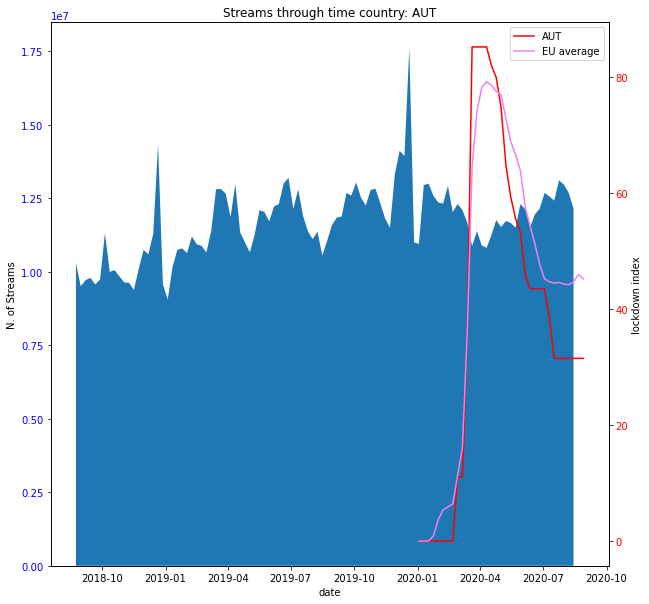

In [32]:
# Countries code:
# 'AUT','BEL','BGR', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC',
# 'HUN', 'IRL', 'ITA', 'LTU', 'LUX', 'LVA', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SWE'
#


# Generate Graph function
country_vs_mean('AUT')


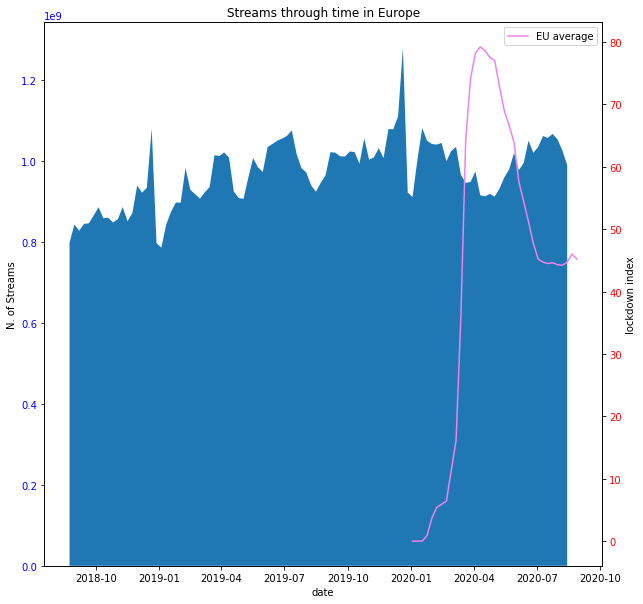

In [33]:
  
#EU graph - combining all total streams 

fig, axs = plt.subplots( figsize=(10, 10))



axs.stackplot(df.index, df['EU'])

ax2=axs.twinx()
ax2.plot(index_df.index, index_df['mean'], color='violet', label='EU average')
ax2.legend()

axs.set_xlabel('date')
axs.set_ylabel('N. of Streams')
axs.set_title('Streams through time in Europe')
axs.tick_params(axis='y', labelcolor='blue')

ax2.set_ylabel('lockdown index')
ax2.tick_params(axis='y', labelcolor='red')
plt.savefig('total_streams_EU.png')